In [1]:
!pip install warnings
!pip install graphviz

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [31]:
import os
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, cross_val_score # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import graphviz

#import graphviz

"""
Si no funciona graphviz descargar del link: https://graphviz.gitlab.io/_pages/Download/Download_windows.html
Setear la variable de entorno
Solucion:
https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
"""
os.environ["PATH"] += os.pathsep + 'C:/graphviz/bin'

import warnings




warnings.filterwarnings('ignore')

In [32]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Cargando Datos

In [33]:
datatrain= pd.read_csv("Datos/train.csv")
datatest = pd.read_csv("Datos/test.csv")

In [34]:
datatrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Contando Cuantos Datos Faltan

In [35]:
valores_faltantes_column = (datatrain.isnull().sum())

print(valores_faltantes_column[valores_faltantes_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# Gráficando Cuantos Datos Faltan por Variable

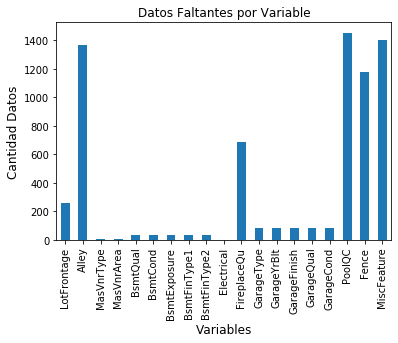

In [36]:
ax = valores_faltantes_column[valores_faltantes_column > 0].plot(kind='bar', title ="Datos Faltantes por Variable")
ax.set_xlabel("Variables", fontsize=12)
ax.set_ylabel("Cantidad Datos", fontsize=12)

plt.show()

# Completando Informacion en Datos de Entrenamiento

In [37]:
# fill up MSZoning with the mode value
datatrain['MSZoning'] = datatrain['MSZoning'].fillna(datatrain['MSZoning'].mode()[0])

# LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
datatrain["LotFrontage"] = datatrain.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# from the data description file, NA = No Alley Access
datatrain['Alley'].fillna(0, inplace=True)

# fill up NA values with mode
datatrain['Utilities'] = datatrain['Utilities'].fillna(datatrain['Utilities'].mode()[0])

# since both Exterior1st and 2nd only has 2 missing value, substitute with mode
datatrain['Exterior1st'] = datatrain['Exterior1st'].fillna(datatrain['Exterior1st'].mode()[0])
datatrain['Exterior2nd'] = datatrain['Exterior2nd'].fillna(datatrain['Exterior2nd'].mode()[0])

# fill up MasVnrType with the mode value
datatrain["MasVnrType"] = datatrain["MasVnrType"].fillna(datatrain['MasVnrType'].mode()[0])
datatrain["MasVnrArea"] = datatrain["MasVnrArea"].fillna(datatrain['MasVnrArea'].mode()[0])

# for these columns, NA = No Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    datatrain[col] = datatrain[col].fillna('None')
    
# for these columns, NA is likely to be 0 due to no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    datatrain[col] = datatrain[col].fillna(0)
    
# substitue NA value here with mode
datatrain['Electrical'] = datatrain['Electrical'].fillna(datatrain['Electrical'].mode()[0])

# substitute NA value with mode
datatrain['KitchenQual'] = datatrain['KitchenQual'].fillna(datatrain['KitchenQual'].mode()[0])

# if no value, assume Typ, typical is also mode value
datatrain['Functional'] = datatrain['Functional'].fillna(datatrain['Functional'].mode()[0])

# NA = No Fireplace
datatrain['FireplaceQu'] = datatrain['FireplaceQu'].fillna('None')

# for these columns, NA = No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    datatrain[col] = datatrain[col].fillna('None')
    
# as there is no garage, NA value for this column is set to zero
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    datatrain[col] = datatrain[col].fillna(0)
    
# NA = no pool
datatrain['PoolQC'] = datatrain['PoolQC'].fillna('None')

# NA = no fence
datatrain['Fence'] = datatrain['Fence'].fillna('None')

#Misc Feature, NA = None
datatrain['MiscFeature'] = datatrain['MiscFeature'].fillna('None')

#sale type, only have 1 NA value. substitute it with mode value
datatrain['SaleType'] = datatrain['SaleType'].fillna(datatrain['SaleType'].mode()[0])

# checking for any null value left
datatrain.isnull().sum().sum()

0

# Completando Informacion en Datos de Test

In [38]:
# fill up MSZoning with the mode value
datatest['MSZoning'] = datatest['MSZoning'].fillna(datatest['MSZoning'].mode()[0])

# LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
datatest["LotFrontage"] = datatest.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# from the data description file, NA = No Alley Access
datatest['Alley'].fillna(0, inplace=True)

# fill up NA values with mode
datatest['Utilities'] = datatest['Utilities'].fillna(datatest['Utilities'].mode()[0])

# since both Exterior1st and 2nd only has 2 missing value, substitute with mode
datatest['Exterior1st'] = datatest['Exterior1st'].fillna(datatest['Exterior1st'].mode()[0])
datatest['Exterior2nd'] = datatest['Exterior2nd'].fillna(datatest['Exterior2nd'].mode()[0])

# fill up MasVnrType with the mode value
datatest["MasVnrType"] = datatest["MasVnrType"].fillna(datatest['MasVnrType'].mode()[0])
datatest["MasVnrArea"] = datatest["MasVnrArea"].fillna(datatest['MasVnrArea'].mode()[0])

# for these columns, NA = No Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    datatest[col] = datatest[col].fillna('None')
    
# for these columns, NA is likely to be 0 due to no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    datatest[col] = datatest[col].fillna(0)
    
# substitue NA value here with mode
datatest['Electrical'] = datatest['Electrical'].fillna(datatest['Electrical'].mode()[0])

# substitute NA value with mode
datatest['KitchenQual'] = datatest['KitchenQual'].fillna(datatest['KitchenQual'].mode()[0])

# if no value, assume Typ, typical is also mode value
datatest['Functional'] = datatest['Functional'].fillna(datatest['Functional'].mode()[0])

# NA = No Fireplace
datatest['FireplaceQu'] = datatest['FireplaceQu'].fillna('None')

# for these columns, NA = No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    datatest[col] = datatest[col].fillna('None')
    
# as there is no garage, NA value for this column is set to zero
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    datatest[col] = datatest[col].fillna(0)
    
# NA = no pool
datatest['PoolQC'] = datatest['PoolQC'].fillna('None')

# NA = no fence
datatest['Fence'] = datatest['Fence'].fillna('None')

#Misc Feature, NA = None
datatest['MiscFeature'] = datatest['MiscFeature'].fillna('None')

#sale type, only have 1 NA value. substitute it with mode value
datatest['SaleType'] = datatest['SaleType'].fillna(datatest['SaleType'].mode()[0])

# checking for any null value left
datatest.isnull().sum().sum()

0

In [39]:
datatrain['precio_menor_200k'] = datatrain['SalePrice'].map(lambda x : 1 if x > 200000 else 0) 
datatrain['precio_menor_200k'] = datatrain['precio_menor_200k'].astype('category')

datatrain.loc[datatrain['SalePrice']>200000,'precio_menor_200k'] = 1
datatrain.loc[datatrain['SalePrice']<=200000,'precio_menor_200k'] = 0
datatrain['precio_menor_200k'] = datatrain['precio_menor_200k'].astype('category')

datatest['precio_menor_200k'] = datatrain['SalePrice'].map(lambda x : 1 if x > 200000 else 0) 
datatest['precio_menor_200k'] = datatrain['precio_menor_200k'].astype('category')

datatest.loc[datatrain['SalePrice']>200000,'precio_menor_200k'] = 1
datatest.loc[datatrain['SalePrice']<=200000,'precio_menor_200k'] = 0
datatest['precio_menor_200k'] = datatrain['precio_menor_200k'].astype('category')

In [40]:
datatrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,precio_menor_200k
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,1


In [41]:
datatest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,precio_menor_200k
0,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,6,2010,WD,Normal,1
1,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,None,None,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,3,2010,WD,Normal,1
3,1464,60,RL,78.0,9978,Pave,0,IR1,Lvl,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,0,IR1,HLS,AllPub,...,0,None,None,None,0,1,2010,WD,Normal,1


## Exportando Datos 

In [42]:
datatrain.to_csv(r'datos_casas.csv', index = False)

In [43]:
datatran_re = datatrain.copy()

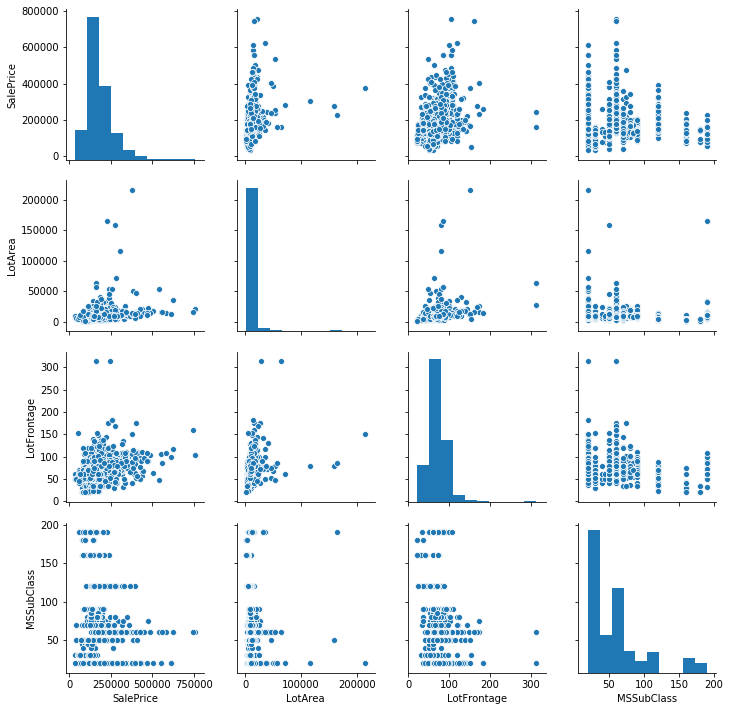

In [44]:
sb.pairplot(datatrain,vars=["SalePrice","LotArea","LotFrontage","MSSubClass"])

In [45]:
variables_utilizadas =['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','BsmtHalfBath','GarageYrBlt',
            'GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal','MoSold','GarageArea']

X = datatrain[variables_utilizadas] # Features
y = datatrain.precio_menor_200k # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9041095890410958


In [46]:
X =         ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','BsmtHalfBath','GarageYrBlt',
            'GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal','MoSold','GarageArea']

X = datatrain[X] # Features
y = datatrain.precio_menor_200k # Target variable

feat_names = X.columns
targ_names = ['1','0']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=3,test_size=.1)
clf = DecisionTreeClassifier(max_depth=None).fit(X_train,Y_train)


In [47]:
print("Training: "+str(clf.score(X_train,Y_train)))
print("Test: "+str(clf.score(X_test,Y_test)))

Training: 1.0
Test: 0.9452054794520548


[[920   0]
 [  0 394]]


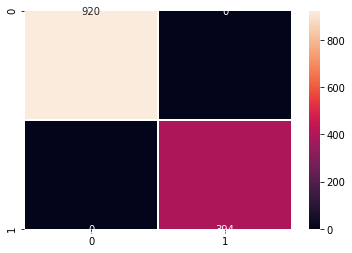

In [48]:
pred = clf.predict(X_train)
confusion_matrix = confusion_matrix(y_true=Y_train,y_pred=pred)

sb.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=.5)

print(confusion_matrix)

In [49]:
print("Puntaje Precision: "+str(precision_score(Y_train,pred))) # tp/tp+fp
print("Puntaje Exactitud: "+str(accuracy_score(Y_train,pred))) # total correct 
print("Puntaje de Llamada: "+str(recall_score(Y_train,pred)))   # tp/tp+fn
print("Puntaje Datos Test score : "+str(f1_score(Y_train,pred)))

Puntaje Precision: 1.0
Puntaje Exactitud: 1.0
Puntaje de Llamada: 1.0
Puntaje Datos Test score : 1.0


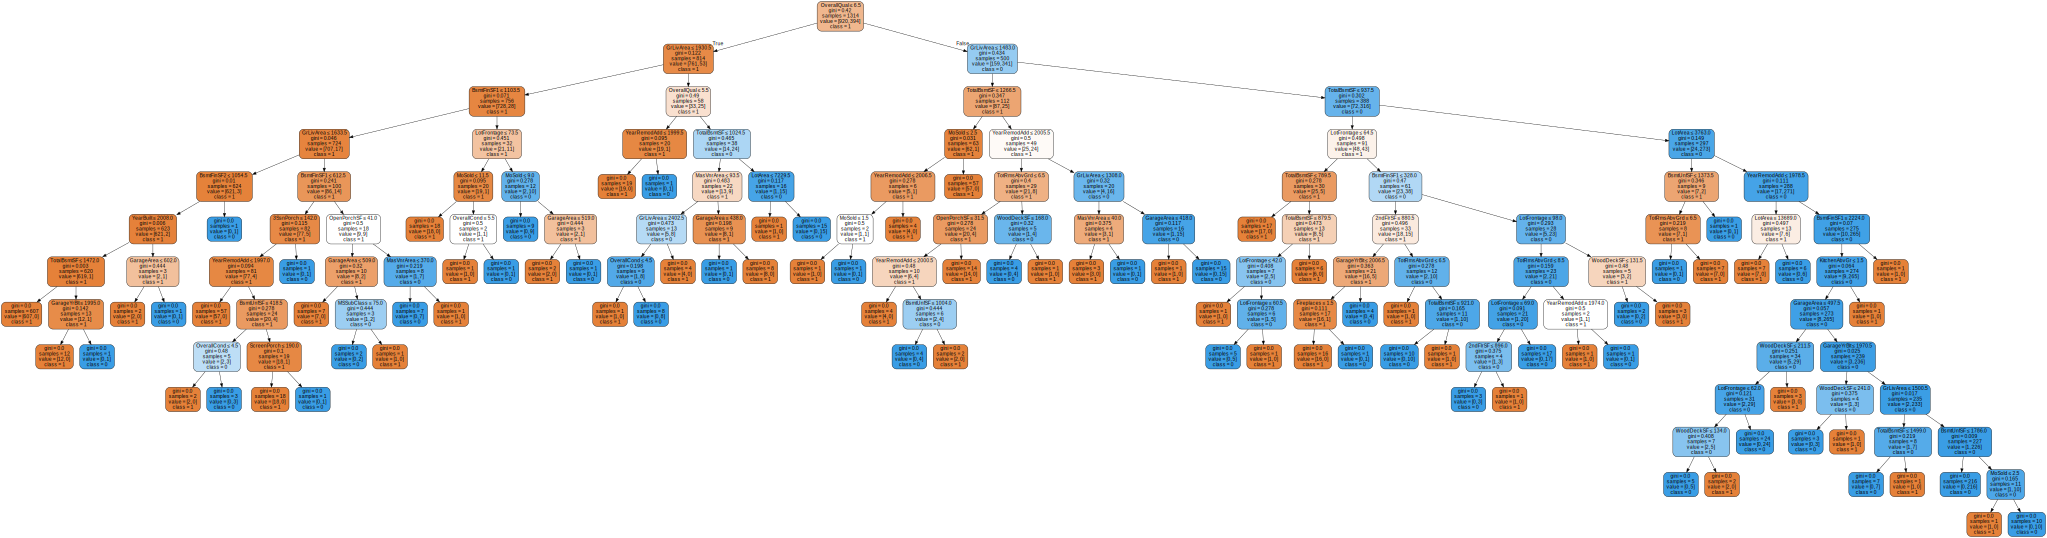

In [127]:
data = export_graphviz(clf,out_file=None,feature_names=feat_names,class_names=targ_names,   
                         filled=True, rounded=True,  
                         special_characters=True)


graph = graphviz.Source(data,filename='mapa_arbol', format="png")
graph.view()

graph

# Ajustando modelo para que sea mas exacto

In [50]:
feature_cols =['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','BsmtHalfBath','GarageYrBlt',
            'GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal','MoSold','GarageArea']

In [51]:
X = datatrain[feature_cols] # Features
y = datatrain.precio_menor_200k # Target variable

feat_names = X.columns
targ_names = ['1','0']

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=3,test_size=.1)

In [53]:
clf = DecisionTreeClassifier(max_depth=10).fit(X_train,Y_train)
print("Training:"+str(clf.score(X_train,Y_train)))
print("Test:"+str(clf.score(X_test,Y_test)))
pred = clf.predict(X_train)

Training:0.9969558599695586
Test:0.9246575342465754


In [54]:
print("Puntaje Precision: "+str(precision_score(Y_train,pred))) # tp/tp+fp
print("Puntaje Exactitud: "+str(accuracy_score(Y_train,pred))) # total correct 
print("Puntaje de Llamada: "+str(recall_score(Y_train,pred)))   # tp/tp+fn
print("Puntaje Datos Test score : "+str(f1_score(Y_train,pred)))

Puntaje Precision: 0.9899497487437185
Puntaje Exactitud: 0.9969558599695586
Puntaje de Llamada: 1.0
Puntaje Datos Test score : 0.9949494949494949


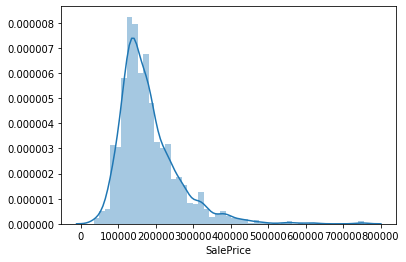

In [55]:
sb.distplot(datatrain['SalePrice'])

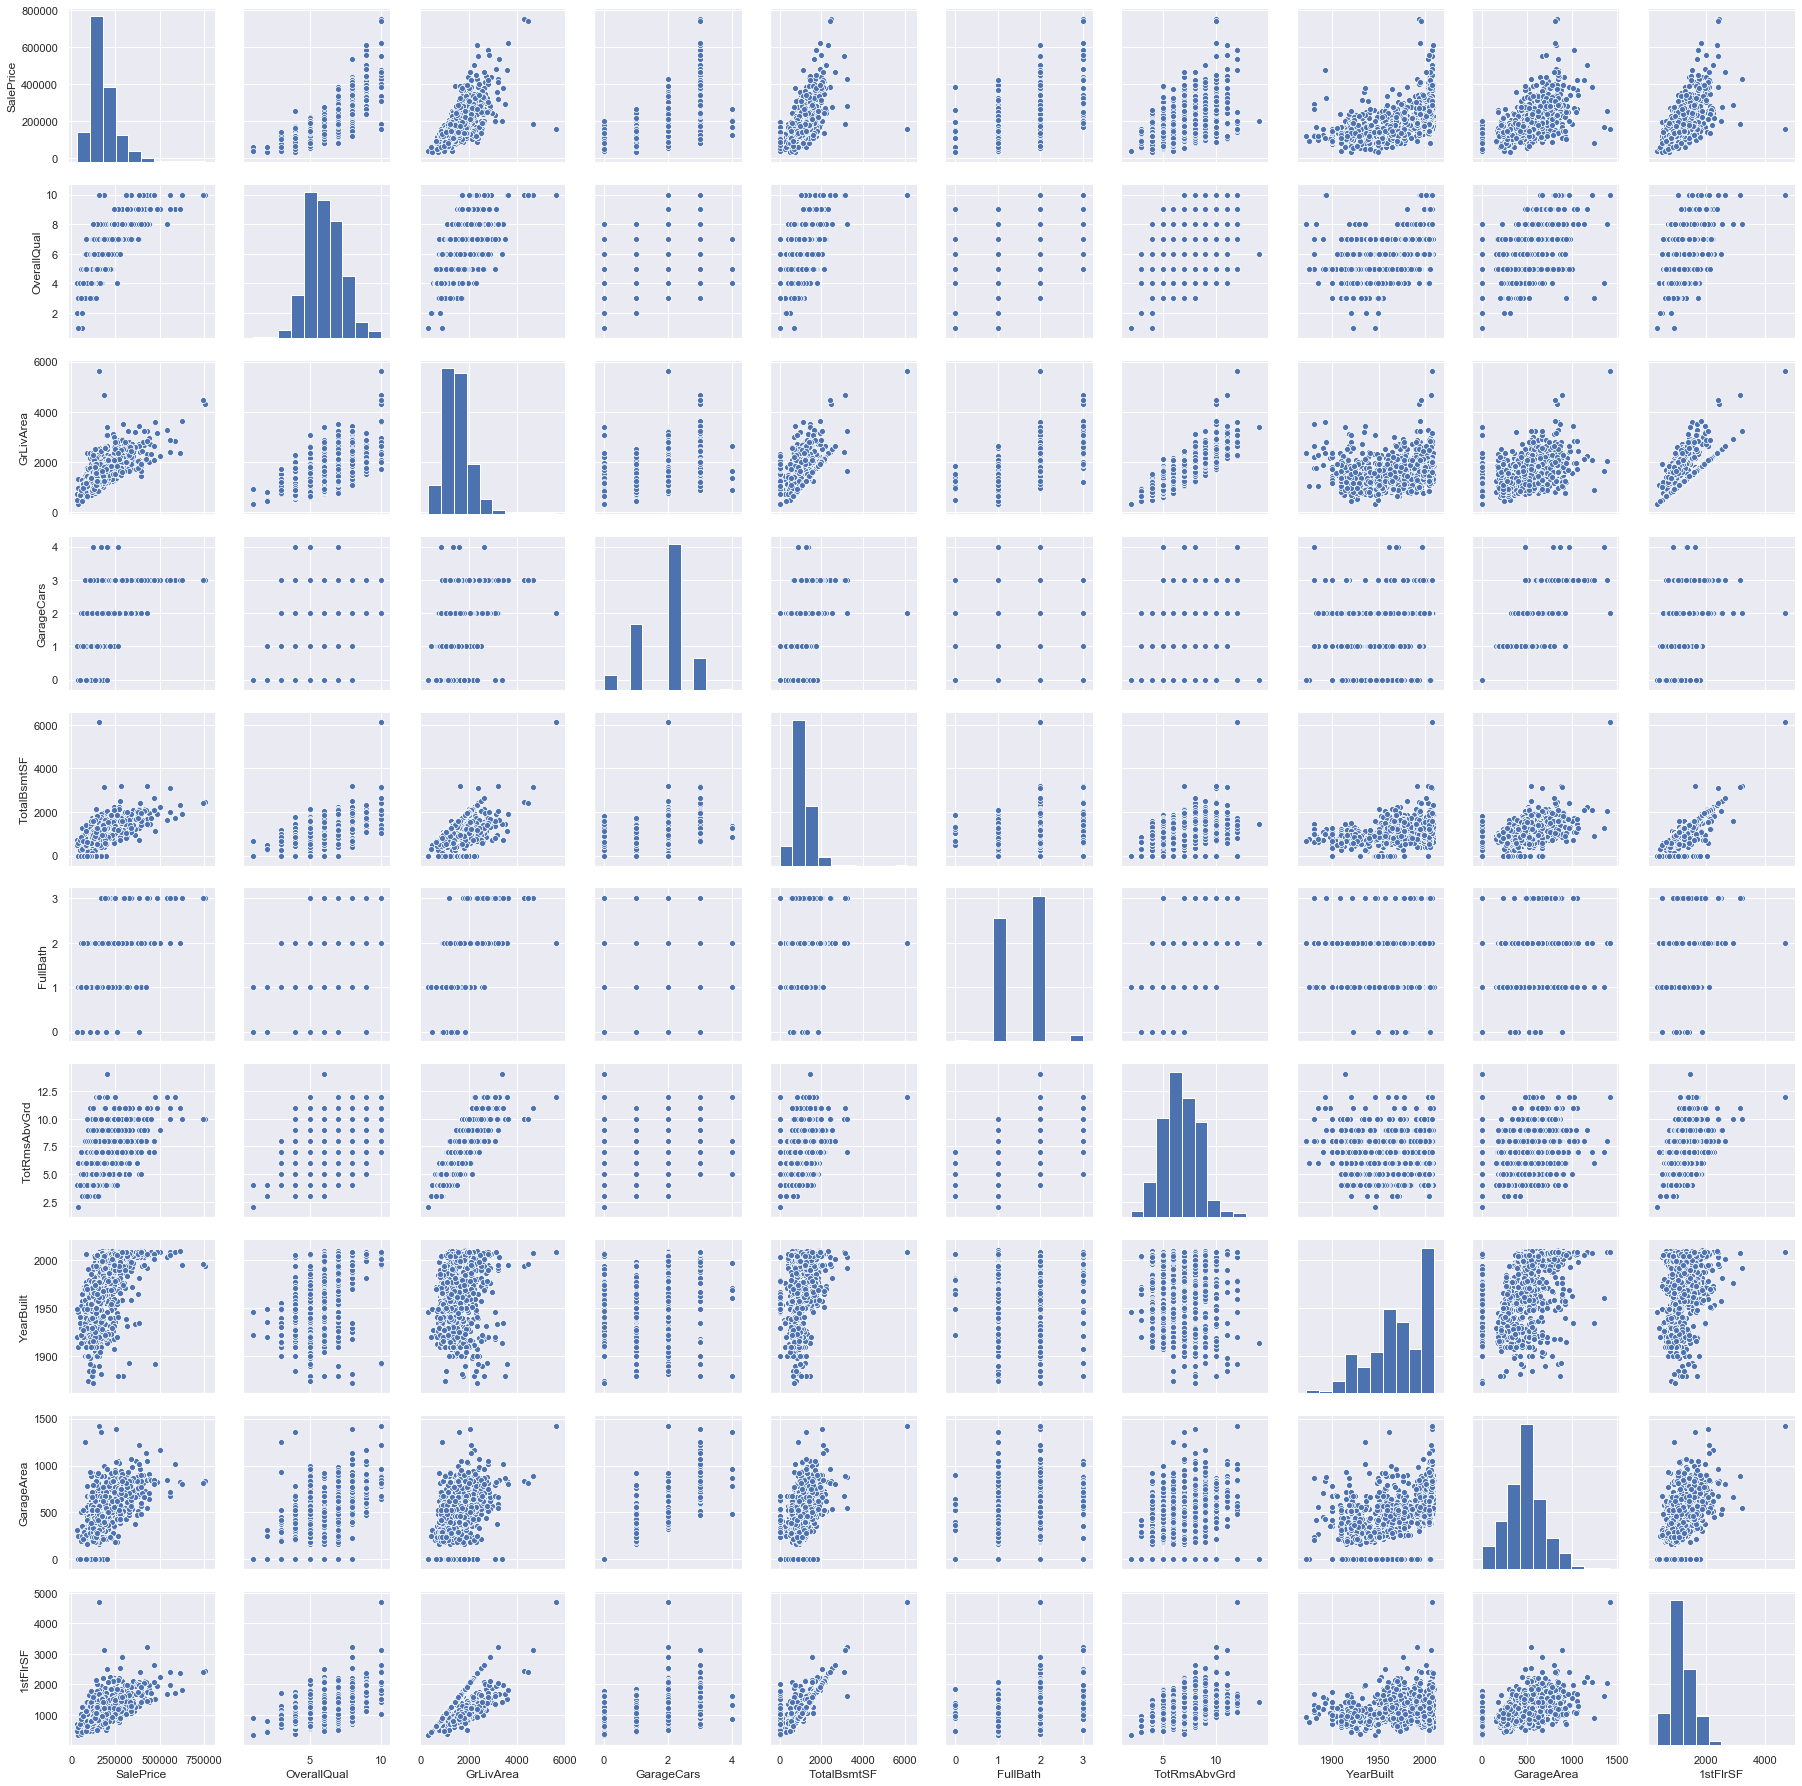

In [56]:
sb.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','GarageArea','1stFlrSF']
sb.pairplot(datatrain[cols], size = 2.5)
plt.show()

# Random Forest

In [57]:
X = datatrain[feature_cols] # Features
y = datatrain.precio_menor_200k # Target variable

In [58]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [59]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)# predictions
rfc_predict = rfc.predict(X_test)

In [60]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [61]:
print("=== Confusion Matrix ===")

confusion_matrix = confusion_matrix(y_test, rfc_predict)
sb.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=.5)
print(confusion_matrix)

print("\n=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print("\n=== All AUC Scores ===")
print(rfc_cv_score)
print("\n=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


=== Confusion Matrix ===


TypeError: 'numpy.ndarray' object is not callable

# Regresión Lineal

In [62]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [63]:
datatran_re.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,precio_menor_200k
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,1


In [64]:
columnas = ['MSSubClass','LotFrontage','LotArea','YearBuilt','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtFullBath',
     'BedroomAbvGr','KitchenAbvGr','GarageArea']

X = datatran_re[columnas] # Features
y = datatran_re.SalePrice # Target variable
y_test = datatran_re.SalePrice # Target variable

# Multicolinealidad

In [65]:
datatran_re[columnas].corr()

,MSSubClass,LotFrontage,LotArea,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,GarageArea
MSSubClass,1.000000,-0.370367,-0.139781,0.027850,0.023573,-0.238518,0.074853,0.003491,-0.023438,0.281721,-0.098672
LotFrontage,-0.370367,1.000000,0.335957,0.120999,0.195830,0.381038,0.385190,0.107226,0.245232,-0.005627,0.339085
LotArea,-0.139781,0.335957,1.000000,0.014228,0.103321,0.260833,0.263116,0.158155,0.119690,-0.017784,0.180403
YearBuilt,0.027850,0.120999,0.014228,1.000000,0.311600,0.391452,0.199010,0.187599,-0.070651,-0.174800,0.478954
MasVnrArea,0.023573,0.195830,0.103321,0.311600,1.000000,0.360067,0.388052,0.083010,0.102775,-0.038450,0.370884
TotalBsmtSF,-0.238518,0.381038,0.260833,0.391452,0.360067,1.000000,0.454868,0.307351,0.050450,-0.068901,0.486665
GrLivArea,0.074853,0.385190,0.263116,0.199010,0.388052,0.454868,1.000000,0.034836,0.521270,0.100063,0.468997
BsmtFullBath,0.003491,0.107226,0.158155,0.187599,0.083010,0.307351,0.034836,1.000000,-0.150673,-0.041503,0.179189
BedroomAbvGr,-0.023438,0.245232,0.119690,-0.070651,0.102775,0.050450,0.521270,-0.150673,1.000000,0.198597,0.065253
KitchenAbvGr,0.281721,-0.005627,-0.017784,-0.174800,-0.038450,-0.068901,0.100063,-0.041503,0.198597,1.000000,-0.064433


# Regresión

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# utilizamos el paquete statsmodel para construir nuestro modelo lineal a la “R”
model=lm.fit(X,y)

#sm.ols(formula="y ~ X", data=datatran_re).fit()
regressor_OLS = sm.OLS(endog=y, exog=X).fit()

# imprimimos el resultado del modelo
print(regressor_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2732.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                        0.00
Time:                        11:28:27   Log-Likelihood:                         -17627.
No. Observations:                1460   AIC:                                  3.528e+04
Df Residuals:                    1449   BIC:                                  3.533e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# Precios Predecidos VS Precios

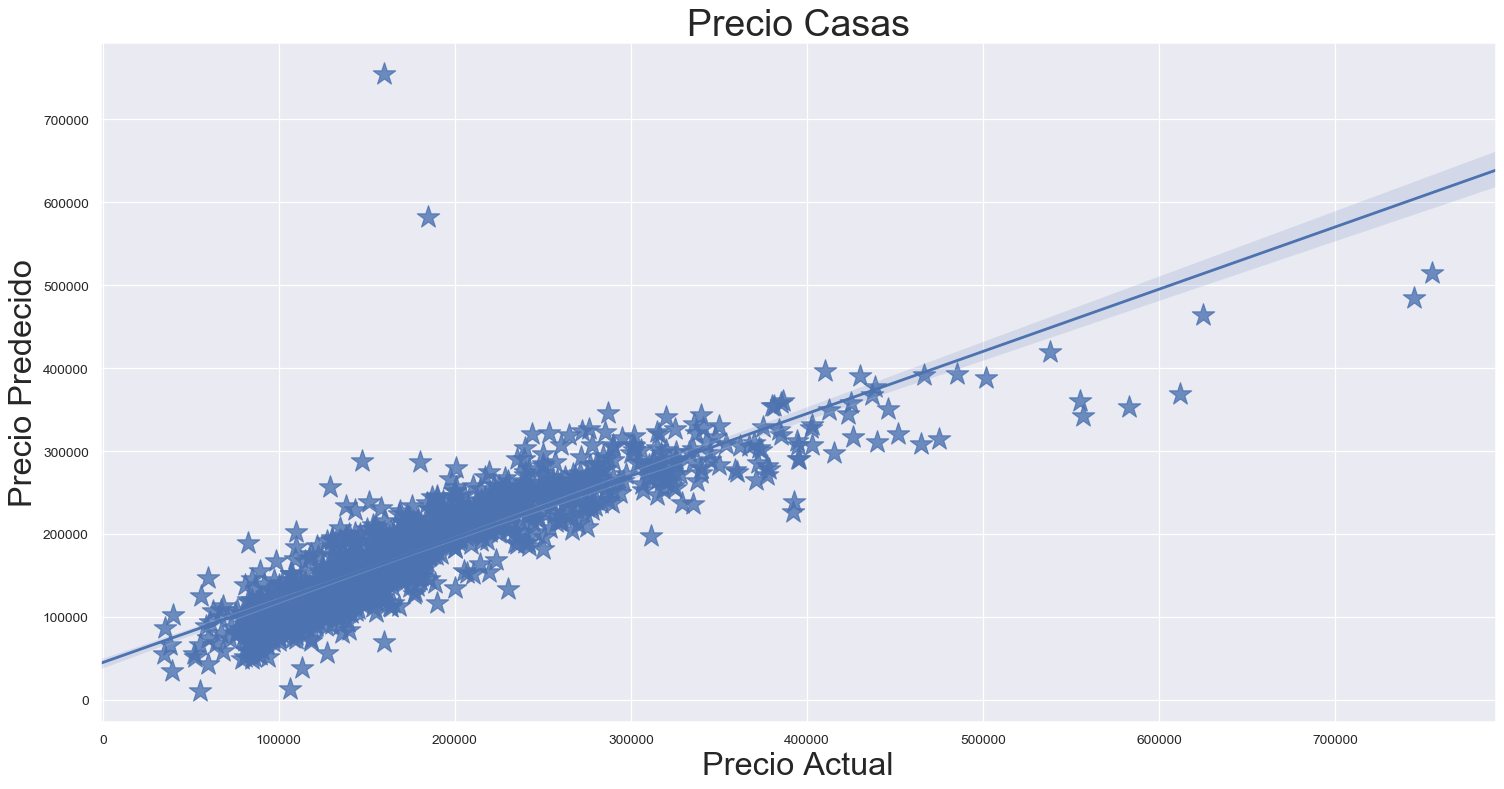

In [69]:
p=lm.predict(X)

prediccion = lm.predict(X)

plt.figure(num=3, figsize=(20, 10), dpi=90, facecolor='w', edgecolor='aqua')
sns.regplot(y, p, data=datatran_re, marker='*', scatter_kws={'s': 350})

SIZE2=20
plt.rc('xtick', labelsize=SIZE2) # fontsize of the tick X labels
plt.rc('ytick', labelsize=SIZE2) # fontsize of the tick Y labels

plt.title('Precio Casas', size=30)
plt.xlabel('Precio Actual', size=26)
plt.ylabel('Precio Predecido', size=26)
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(X,p)
print(cfm)


ValueError: Classification metrics can't handle a mix of continuous-multioutput and continuous targets

# Residuos VS Valores Predecidos

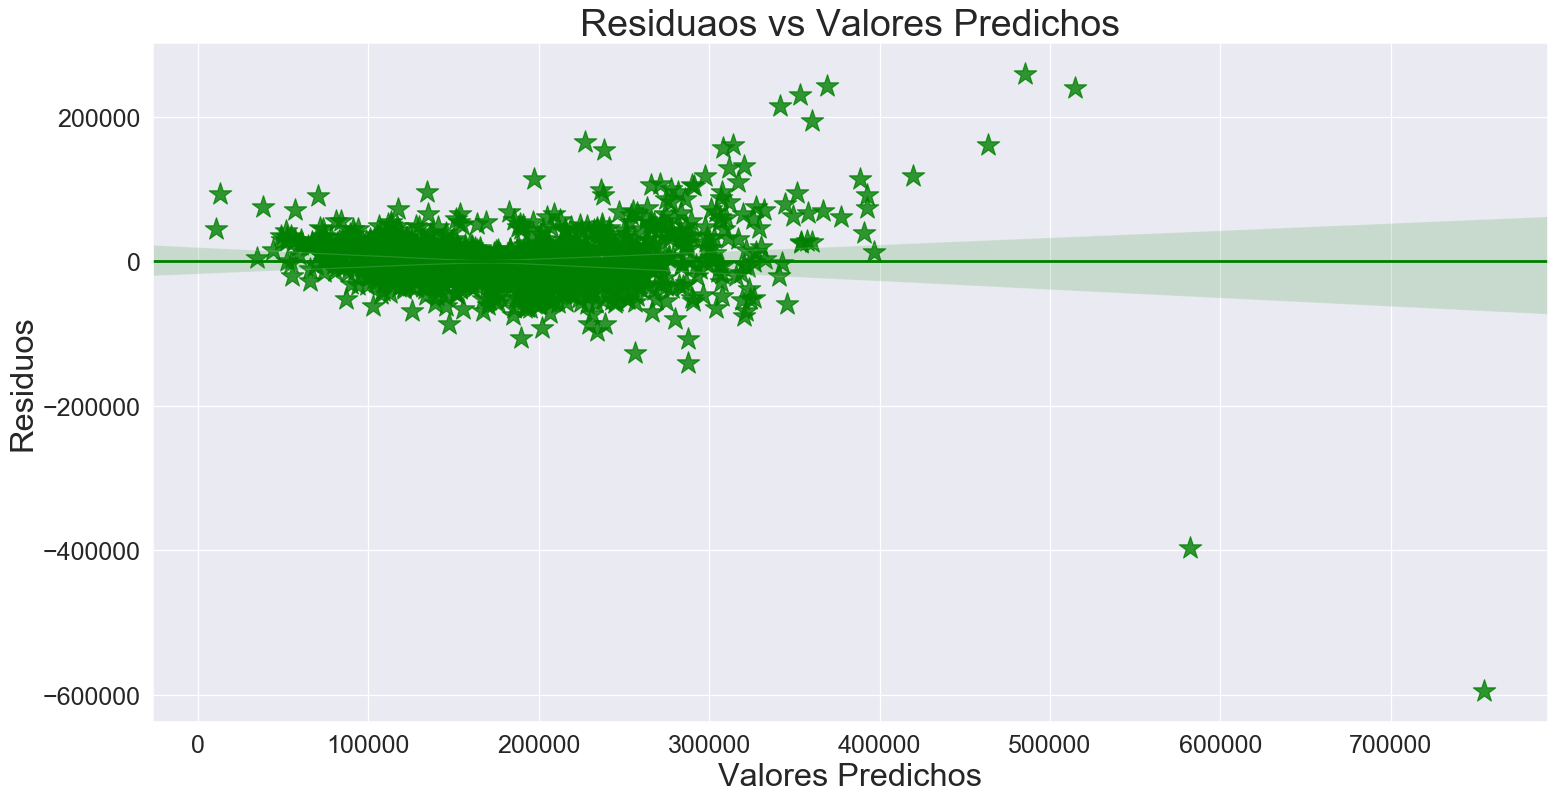

In [101]:
p=lm.predict(X)

residuals=y-p

plt.figure(num=3, figsize=(20, 10), dpi=90, facecolor='w', edgecolor='green')
sns.regplot(p, residuals, data=datatran_re, marker='*', scatter_kws={'s': 350}, color='green')
plt.title('Residuaos vs Valores Predichos', size=30)
plt.xlabel('Valores Predichos', size=26)
plt.ylabel('Residuos', size=26)
plt.show()

# Histograma (Gráfica QQ)

Text(0.5, 0, 'Normalidad de Residuos')

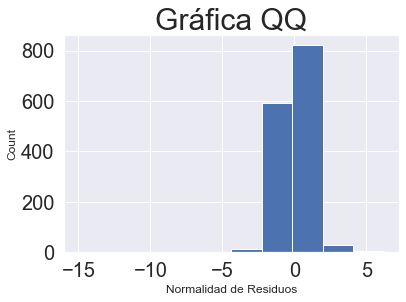

In [102]:
plt.hist(regressor_OLS.resid_pearson)
plt.title('Gráfica QQ', size=30)
plt.ylabel('Count')
plt.xlabel('Normalidad de Residuos')

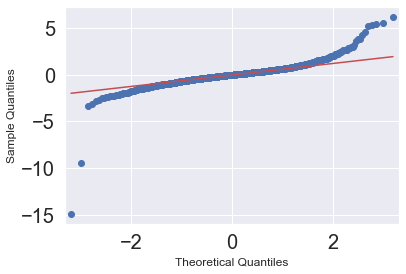

In [103]:
ax=sm.qqplot(regressor_OLS.resid_pearson, line='q')

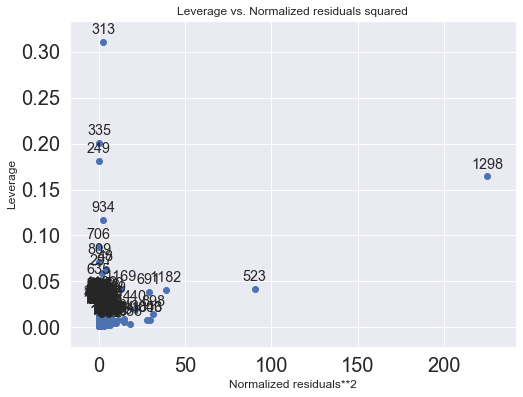

In [104]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.plot_leverage_resid2(regressor_OLS, ax=ax)

In [109]:
print("=== Confusion Matrix ===")
print(prediccion)
print(y_test)


=== Confusion Matrix ===
[226650.06541959 160731.53016325 235679.71004679 ... 204585.74926385
 137138.07429922 155971.63794203]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
